In [2]:
# Inclusão de bibliotecas necessárias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import math

In [3]:
# Estruturas usadas ao longo do código:

lista_y = {'heun': [], 'ponto_medio': [], 'RK4': [], 'euler_regressivo': [], 'trapezio': [], 'euler_reg_nonlinear': [], 'trapezio_nonlinear': []}
erros_abs = {'heun': [], 'ponto_medio': [], 'RK4': [], 'euler_regressivo': [], 'trapezio': [], 'euler_reg_nonlinear': [], 'trapezio_nonlinear': []}
truncamento_global = {'heun': [], 'ponto_medio': [], 'RK4': [], 'euler_regressivo': [], 'trapezio': [], 'euler_reg_nonlinear': [], 'trapezio_nonlinear': []}

# 1. Métodos de Runge-Kutta

Nesse trabalho, vamos implementar os **Métodos de Runge-Kutta** de 2 e 4 estágios para o seguinte PVI:

$$
\begin{cases}
    y' = -y + 2 \cos t, \\
    y(0) = 1
\end{cases}
$$

A solução analítica desse problema pode ser obtida através do *método do fator integrante*:  $y = \sin t + \cos t$.

In [4]:
# f(x, y)
def f1(a, b):
    return -b + 2*np.cos(a)

# Solução analítica
def sol_analitica_1(t):
    return np.sin(t) + np.cos(t)

In [5]:
# Constantes do PVI e do problema

lista_h = 2**(np.linspace(0,-8,9))
lista_t = []

y0 = 1
t0 = 0
tf = 10

## 1.1. Ordem 2

Inicialmente, vamos implementar os métodos de ordem 2. Especificamente, vamos implementar o **Método de Heun** ($b_2 = \frac{1}{2}$) e o **Método do ponto médio** ($b_2 = 1$).

In [6]:
# Variantes dos métodos de Runge-Kutta utilizados

def heun(t, y, h):

    k1 = f1(t, y)
    k2 = f1(t + h, y + h*k1)

    return y + (h/2)*(k1 + k2)

def ponto_medio(t, y, h):

    k1 = f1(t, y)
    k2 = f1(t + h/2, y + h/2 * k1)

    return y + h*k2

#### Avaliação dos métodos em diferentes tamanhos de passo:

In [7]:
for h in lista_h:
    N = int((tf - t0)/h)

    t = np.linspace(t0, tf, N + 1)

    y_heun = np.zeros_like(t)
    y_heun[0] = y0

    y_ponto_medio = np.zeros_like(t)
    y_ponto_medio[0] = y0
    
    # Passo de Heun e passo do Ponto médio
    for n in range(N):
        y_heun[n+1] = heun(t[n], y_heun[n], h)
        y_ponto_medio[n+1] = ponto_medio(t[n], y_ponto_medio[n], h)

    lista_t.append(t)

    lista_y['heun'].append(y_heun)
    lista_y['ponto_medio'].append(y_ponto_medio)

    erros_abs['heun'].append(abs(sol_analitica_1(t) - y_heun))
    erros_abs['ponto_medio'].append(abs(sol_analitica_1(t) - y_ponto_medio))
    

#### Plotando os gráficos:

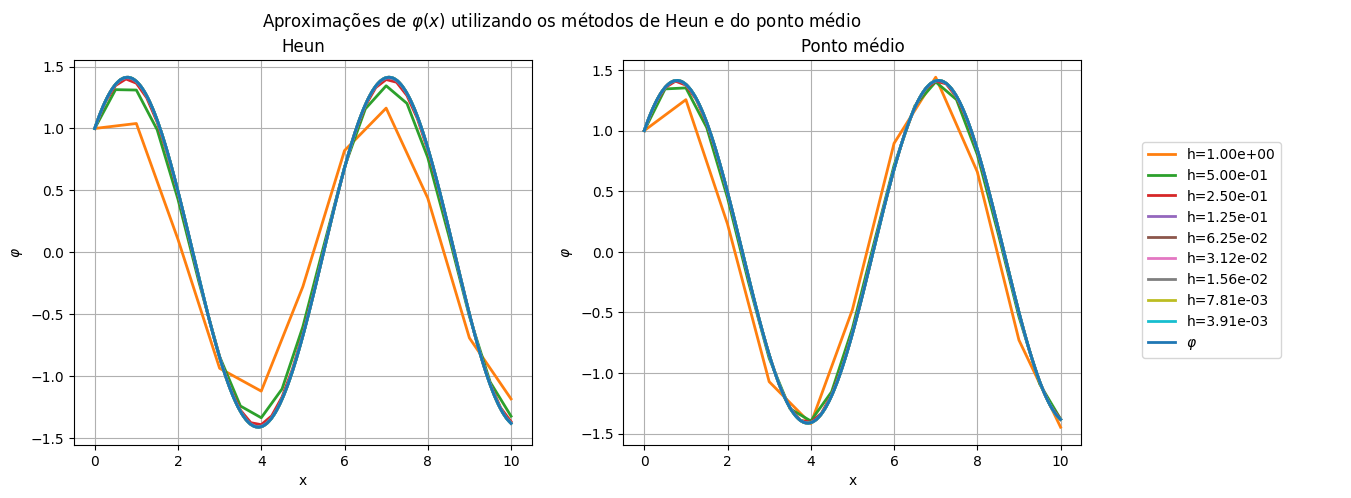

In [8]:
x1 = np.linspace(t0, tf, 100)
y1 = sol_analitica_1(x1)

fig, axs = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle(r'Aproximações de $\varphi(x)$ utilizando os métodos de Heun e do ponto médio')

# Figura 1:
axs[0].set_title('Heun')
axs[0].set_ylabel(r'$\varphi$')
axs[0].set_xlabel('x')
axs[0].grid(True)

for j in range(len(lista_h)):
    axs[0].plot(lista_t[j], lista_y['heun'][j], label='h='+str(lista_h[j]), color='C'+str(j+1), linestyle='-', linewidth=2)

axs[0].plot(x1, y1, label=r'$\varphi$', color='C0', linestyle='-', linewidth=2)

# Figura 2:
axs[1].set_title('Ponto médio')
axs[1].set_ylabel(r'$\varphi$')
axs[1].set_xlabel('x')
axs[1].grid(True)

for j in range(len(lista_h)):
    axs[1].plot(lista_t[j], lista_y['ponto_medio'][j], label='h='+ f"{lista_h[j]:.2e}", color='C'+str(j+1), linestyle='-', linewidth=2)

axs[1].plot(x1, y1, label=r'$\varphi$', color='C0', linestyle='-', linewidth=2)


# Legenda
legend_ax = fig.add_axes([0.9, 0.3, 0.2, 0.4]) 
legend_ax.axis("off") 
legend_ax.legend(*axs[1].get_legend_handles_labels(), loc="center") 


#### Calculando os erros de truncamento global e a ordem de erro dos métodos:

Ordem numérica encontrada no método de Heun: 2.06
Ordem numérica encontrada no método do Ponto médio: 2.09


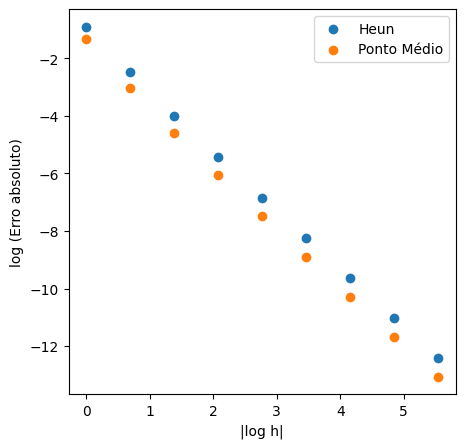

In [9]:
# Calculando o erro de truncamento global
truncamento_global['heun'] = np.array([max(erros_abs['heun'][i]) for i in range(len(lista_h))])
truncamento_global['ponto_medio'] = np.array([max(erros_abs['ponto_medio'][i]) for i in range(len(lista_h))])

# Plotando o log do erro versus o valor absoluto de log h
fig, ax_plot = plt.subplots(figsize=(5,5))

ax_plot.scatter(abs(np.log(lista_h)), np.log(truncamento_global['heun']), label='Heun')
ax_plot.scatter(abs(np.log(lista_h)), np.log(truncamento_global['ponto_medio']), label='Ponto Médio')

ax_plot.set_xlabel('|log h|')
ax_plot.set_ylabel('log (Erro absoluto)')
ax_plot.legend()

# Ordem numérica dos erros
ordem_heun = -np.polyfit(abs(np.log(lista_h)), np.log(truncamento_global['heun']), 1)[0]
ordem_ponto_medio = -np.polyfit(abs(np.log(lista_h)), np.log(truncamento_global['ponto_medio']), 1)[0]

print("Ordem numérica encontrada no método de Heun: %.2f" % ordem_heun)
print("Ordem numérica encontrada no método do Ponto médio: %.2f" % ordem_ponto_medio)

O método de Heun e o método do Ponto médio atingiram ordem numérica 2, valor esperado, uma vez que ambos são métodos de Runge-Kutta de ordem 2.

## 1.2. Ordem superior

Agora, estudaremos um método de Runge-Kutta de ordem superior. Mais especificamente, vamos estudar o **RK4**, de 4 estágios. Continuaremos utilizando o mesmo PVI.

In [10]:
# RK4
def RK4(t, y, h):

    k1 = f1(t, y)
    k2 = f1(t + h/2, y + h*k1/2)
    k3 = f1(t + h/2, y + h*k2/2)
    k4 = f1(t + h, y + h*k3)

    return y + h/6 * (k1 + 2*k2 + 2*k3 + k4)

#### Avaliação do método em diferentes tamanhos de passo:

In [11]:
for h in lista_h:
    N = int((tf - t0)/h)

    t = np.linspace(t0, tf, N + 1)

    y_RK4 = np.zeros_like(t)
    y_RK4[0] = y0

    for n in range(N):
        y_RK4[n+1] = RK4(t[n], y_RK4[n], h)

    lista_y['RK4'].append(y_RK4)
    erros_abs['RK4'].append(abs(sol_analitica_1(t) - y_RK4))

#### Plotando os gráficos

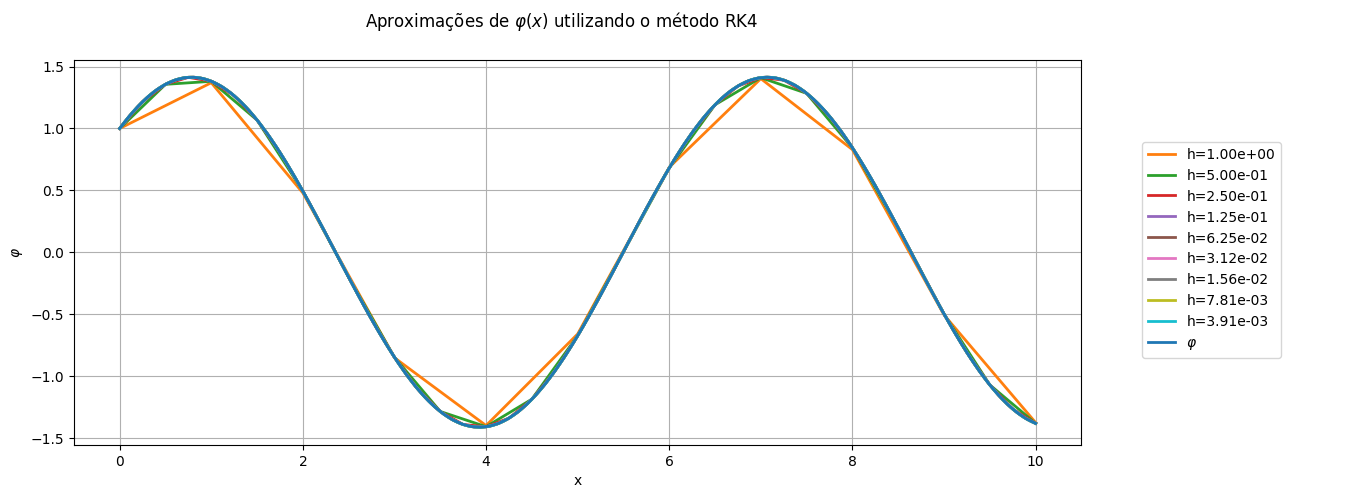

In [12]:
x1 = np.linspace(t0, tf, 100)
y1 = sol_analitica_1(x1)

fig, ax = plt.subplots(figsize=(13, 5))
fig.suptitle(r'Aproximações de $\varphi(x)$ utilizando o método RK4')

# Figura 1:
ax.set_ylabel(r'$\varphi$')
ax.set_xlabel('x')
ax.grid(True)

for j in range(len(lista_h)):
    ax.plot(lista_t[j], lista_y['RK4'][j], label='h='+str(lista_h[j]), color='C'+str(j+1), linestyle='-', linewidth=2)

ax.plot(x1, y1, label=r'$\varphi$', color='C0', linestyle='-', linewidth=2)


# Legenda
legend_ax = fig.add_axes([0.9, 0.3, 0.2, 0.4])
legend_ax.axis("off")
legend_ax.legend(*axs[1].get_legend_handles_labels(), loc="center")


#### Calculando o erro de truncamento global e a ordem de erro do método:

Ordem numérica encontrada no método RK4: 4.07


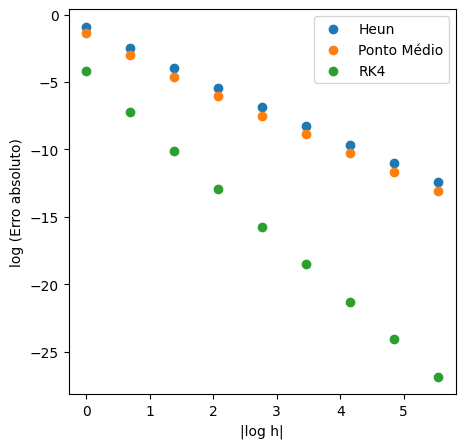

In [13]:
# Calculando o erro de truncamento global
truncamento_global['RK4'] = np.array([max(erros_abs['RK4'][i]) for i in range(len(lista_h))])

# Plotando o log do erro versus o valor absoluto de log h
fig, ax_plot = plt.subplots(figsize=(5,5))

ax_plot.scatter(abs(np.log(lista_h)), np.log(truncamento_global['heun']), label='Heun')
ax_plot.scatter(abs(np.log(lista_h)), np.log(truncamento_global['ponto_medio']), label='Ponto Médio')
ax_plot.scatter(abs(np.log(lista_h)), np.log(truncamento_global['RK4']), label='RK4')


ax_plot.set_xlabel('|log h|')
ax_plot.set_ylabel('log (Erro absoluto)')
ax_plot.legend()

# Ordem numérica do erro
ordem_RK4 = -np.polyfit(abs(np.log(lista_h)), np.log(truncamento_global['RK4']), 1)[0]

print("Ordem numérica encontrada no método RK4: %.2f" % ordem_RK4)

A ordem de erro encontrada para o método RK4 foi de 4, como esperado.

# 2. Métodos implícitos de passo único

A partir de agora, implementaremos os **métodos implícitos de passo único**. Mais especificamente, o método *theta*, para $\theta \in [0, 1]$. Mais especificamente, vamos implementar o **método do Euler regressivo** ($\theta = 1$), e o **método do Trapézio** ($\theta = \frac{1}{2}$)

In [14]:
# Novas variáveis do problema:
lista_h = [0.2, 0.1, 0.05]
lista_t = []

## 2.1. Implementação em problemas lineares

Para a primeira implementação, vamos usar o seguinte PVI:

$$
\begin{cases}
y' = te^{-t} - y \\
y(0) = 1
\end{cases}
$$

no intervalo $[0, 10]$, e com $h = 0.2$, $0.1$ e $0.05$.

Sua solução analítica é

$$ y = e^{-t} \left( \frac{t^2}{2} + 1 \right) $$

O passo do euler regressivo correspondente a esse PVI será:
$$ y_{i+1} = \frac{y_i + h t_{i+1} e^{-t_{i+1}}}{h+1} $$

O passo do método do trapézio correspondente a esse PVI será:

$$y_{i+1} = \frac{y_i + \frac{h}{2} \left[ t_i e^{-t_i} - y_i + t_{i+1} e^{-t_{i+1}} \right]}{\frac{h}{2} + 1}$$

In [15]:
# Sol. analítica
def sol_analitica_2(t):

    return (math.e ** (-t)) * (t*t/2 + 1)

# Euler regressivo
def euler_regressivo(t, y, h):

    t_novo = t + h
    y_novo = (y + h * t_novo * (math.e ** (-t_novo)))/(h+1)
    
    return y_novo

# Trapezio
def trapezio(t, y, h):

    t_novo = t + h
    y_novo = (y + h/2 * ((math.e ** (-t)) * (t) - y + (math.e ** (-t_novo)) * (t_novo)))/(h/2 + 1)
    return y_novo

#### Avaliação dos métodos em diferentes valores de h:

In [16]:
for h in lista_h:
    N = int((tf - t0)/h)

    t = np.linspace(t0, tf, N + 1)

    y_euler_regressivo = np.zeros_like(t)
    y_euler_regressivo[0] = y0

    y_trapezio = np.zeros_like(t)
    y_trapezio[0] = y0
    
    for n in range(N):
        y_euler_regressivo[n+1] = euler_regressivo(t[n], y_euler_regressivo[n], h)
        y_trapezio[n+1] = trapezio(t[n], y_trapezio[n], h)

    lista_t.append(t)

    lista_y['euler_regressivo'].append(y_euler_regressivo)
    lista_y['trapezio'].append(y_trapezio)

    erros_abs['euler_regressivo'].append(abs(sol_analitica_2(t) - y_euler_regressivo))
    erros_abs['trapezio'].append(abs(sol_analitica_2(t) - y_trapezio))

#### Plotando os gráficos:

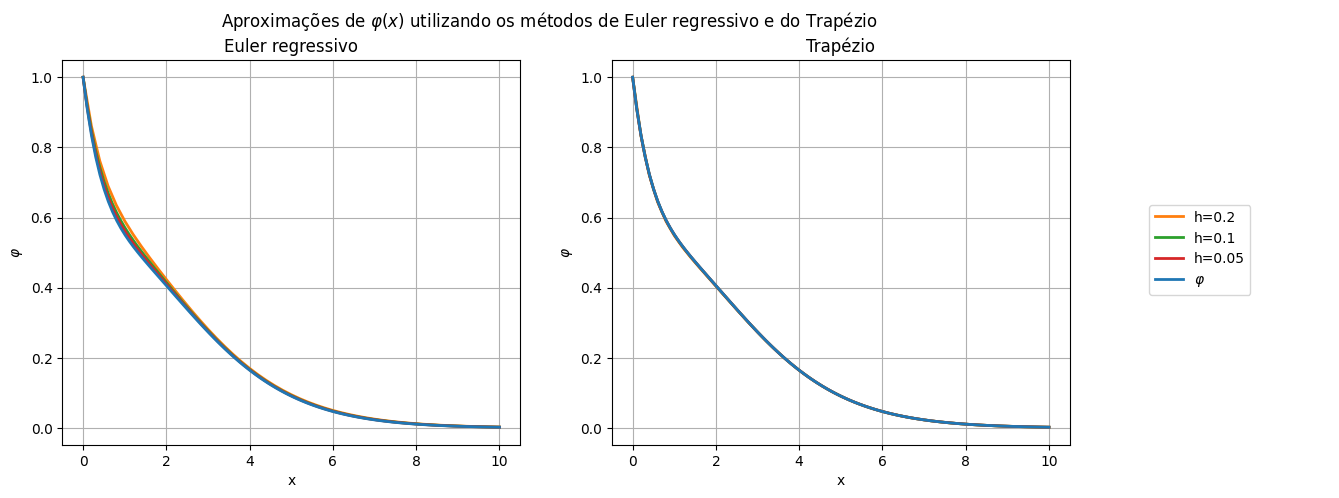

In [17]:
x1 = np.linspace(t0, tf, 100)
y1 = sol_analitica_2(x1)

fig, axs = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle(r'Aproximações de $\varphi(x)$ utilizando os métodos de Euler regressivo e do Trapézio')

# Figura 1:
axs[0].set_title('Euler regressivo')
axs[0].set_ylabel(r'$\varphi$')
axs[0].set_xlabel('x')
axs[0].grid(True)

for j in range(len(lista_h)):
    axs[0].plot(lista_t[j], lista_y['euler_regressivo'][j], label='h='+str(lista_h[j]), color='C'+str(j+1), linestyle='-', linewidth=2)

axs[0].plot(x1, y1, label=r'$\varphi$', color='C0', linestyle='-', linewidth=2)

# Figura 2:
axs[1].set_title('Trapézio')
axs[1].set_ylabel(r'$\varphi$')
axs[1].set_xlabel('x')
axs[1].grid(True)

for j in range(len(lista_h)):
    axs[1].plot(lista_t[j], lista_y['trapezio'][j], label='h='+ str(lista_h[j]), color='C'+str(j+1), linestyle='-', linewidth=2)

axs[1].plot(x1, y1, label=r'$\varphi$', color='C0', linestyle='-', linewidth=2)

# Legenda
legend_ax = fig.add_axes([0.9, 0.3, 0.2, 0.4])  # Position to the right of the main plot
legend_ax.axis("off")  # Turn off axes for legend area
legend_ax.legend(*axs[1].get_legend_handles_labels(), loc="center")  # Copy legend from main plot

#### Calculando os erros de truncamento global:

In [24]:
# Tabela com os erros de truncamento global para os valores em lista_h

truncamento_global['euler_regressivo'] = np.array([max(erros_abs['euler_regressivo'][i]) for i in range(len(lista_h))])
truncamento_global['trapezio'] = np.array([max(erros_abs['trapezio'][i]) for i in range(len(lista_h))])

pd.options.display.float_format = '{:.3e}'.format

d = {}

d['h'] = np.array2string(np.array(lista_h), separator=',', formatter={'float_kind':lambda x: "%.2f" % x}, max_line_width=1000)[1:-1].split(",")

d['Euler regressivo'] = truncamento_global['euler_regressivo']
d['Trapezio'] = truncamento_global['trapezio']

df = pd.DataFrame(data=d)

display(HTML(df.to_html(index=False)))

h,Euler regressivo,Trapezio
0.20,4.218e-02,3.504e-03
0.10,2.251e-02,8.796e-04
0.05,1.165e-02,2.196e-04


## 2.2. Implementação em problemas não-lineares:

Nessa seção, implementaremos métodos implícitos de passo único para o seguinte PVI:

$$
\begin{cases}
y' = -y^2, \\
y(1) = 1
\end{cases}
$$

Esse PVI possui solução analítica $y = \frac{1}{t}$

No entanto, não é possível encontrar o valor exato dos passos implícitos para essa função, uma vez que nesse caso, $f(t, y)$ é quadrática.

Nesse sentido, é necessário buscar outras alternativas para encontrar uma solução. Assim, utilizaremos o método das **aproximações sucessivas**, em que, a partir de uma aproximação inicial $y_{j+1}^{(0)}$, definimos $y_{j+1}^{(1)}, y_{j+1}^{(2)}, y_{j+1}^{(3)}, \dots$, tais que 

$$y_{j+1}^{(k+1)} = y_j + h \left[ (1 - \theta) f(t_j, y_j) + \theta f(t_{j+1}, y_{j+1}^{(k)}) \right],\qquad k = 0, 1, 2, \dots$$

Até que a diferença $|y_{j+1}^{(k+1)} - y_{j+1}^{(k)}|$ seja pequena o suficiente (menor que $10^4$).

A primeira escolha, de $y_{j+1}^{(0)}$ será feita a partir do método de Euler:

$$y_{j+1}^{(0)} = y_j + hf(t_j, y_j)$$

In [19]:
# Novas variáveis do PVI:

lista_t = []

t0 = 1
y0 = 1


In [20]:
# f(x, y)
def f3(a, b):

    return -(b*b)

# Solução analítica
def sol_analitica_3(t):

    return 1/t

# Euler regressivo
def euler_reg_nonlinear(t, y, h):

    t_novo = t + h

    y_velho = y
    y_novo = y + h * f3(t, y)

    while abs(y_novo - y_velho) >= 1e-4:

        y_velho = y_novo
        y_novo = y + h * f3(t_novo, y_velho)

    
    return y_novo

# Trapezio
def trapezio_nonlinear(t, y, h):

    t_novo = t + h

    y_velho = y
    y_novo = y + h * f3(t, y)

    while abs(y_novo - y_velho) >= 1e-4:

        y_velho = y_novo
        y_novo = y + h/2 * (f3(t, y) + f3(t_novo, y_velho))

    return y_novo

#### Avaliação do método em diferentes valores de h:

In [21]:
for h in lista_h:
    N = int((tf - t0)/h)

    t = np.linspace(t0, tf, N + 1)

    y_euler_reg_nonlinear = np.zeros_like(t)
    y_euler_reg_nonlinear[0] = y0

    y_trapezio_nonlinear = np.zeros_like(t)
    y_trapezio_nonlinear[0] = y0
    
    for n in range(N):
        y_euler_reg_nonlinear[n+1] = euler_reg_nonlinear(t[n], y_euler_reg_nonlinear[n], h)
        y_trapezio_nonlinear[n+1] = trapezio_nonlinear(t[n], y_trapezio_nonlinear[n], h)

    lista_t.append(t)

    lista_y['euler_reg_nonlinear'].append(y_euler_reg_nonlinear)
    lista_y['trapezio_nonlinear'].append(y_trapezio_nonlinear)

    erros_abs['euler_reg_nonlinear'].append(abs(sol_analitica_3(t) - y_euler_reg_nonlinear))
    erros_abs['trapezio_nonlinear'].append(abs(sol_analitica_3(t) - y_trapezio_nonlinear))

#### Plotando o gráfico:

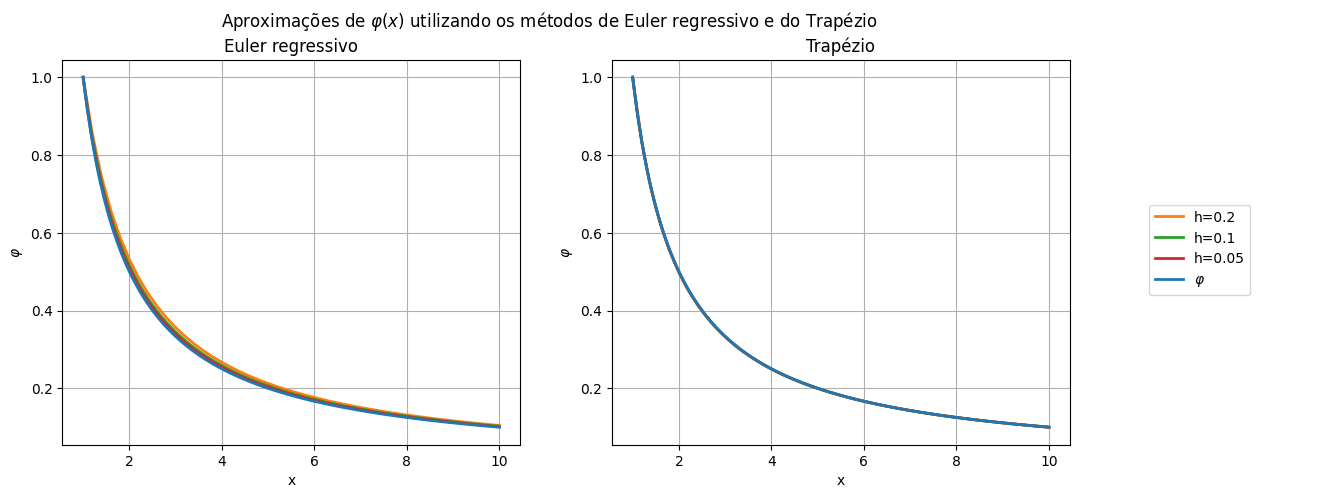

In [22]:
x1 = np.linspace(t0, tf, 100)
y1 = sol_analitica_3(x1)

fig, axs = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle(r'Aproximações de $\varphi(x)$ utilizando os métodos de Euler regressivo e do Trapézio')

# Figura 1:
axs[0].set_title('Euler regressivo')
axs[0].set_ylabel(r'$\varphi$')
axs[0].set_xlabel('x')
axs[0].grid(True)

for j in range(len(lista_h)):
    axs[0].plot(lista_t[j], lista_y['euler_reg_nonlinear'][j], label='h='+str(lista_h[j]), color='C'+str(j+1), linestyle='-', linewidth=2)

axs[0].plot(x1, y1, label=r'$\varphi$', color='C0', linestyle='-', linewidth=2)

# Figura 2:
axs[1].set_title('Trapézio')
axs[1].set_ylabel(r'$\varphi$')
axs[1].set_xlabel('x')
axs[1].grid(True)

for j in range(len(lista_h)):
    axs[1].plot(lista_t[j], lista_y['trapezio_nonlinear'][j], label='h='+ str(lista_h[j]), color='C'+str(j+1), linestyle='-', linewidth=2)

axs[1].plot(x1, y1, label=r'$\varphi$', color='C0', linestyle='-', linewidth=2)

# Legenda
legend_ax = fig.add_axes([0.9, 0.3, 0.2, 0.4])
legend_ax.axis("off")
legend_ax.legend(*axs[1].get_legend_handles_labels(), loc="center")

#### Calculando o erro de truncamento global:

In [23]:
# Tabela com os erros de truncamento global para os valores em lista_h
truncamento_global['euler_reg_nonlinear'] = np.array([max(erros_abs['euler_reg_nonlinear'][i]) for i in range(len(lista_h))])
truncamento_global['trapezio_nonlinear'] = np.array([max(erros_abs['trapezio_nonlinear'][i]) for i in range(len(lista_h))])

pd.options.display.float_format = '{:.3e}'.format

d = {}

d['h'] = np.array2string(np.array(lista_h), separator=',', formatter={'float_kind':lambda x: "%.2f" % x}, max_line_width=1000)[1:-1].split(",")

d['Euler regressivo'] = truncamento_global['euler_reg_nonlinear']
d['Trapezio'] = truncamento_global['trapezio_nonlinear']

df = pd.DataFrame(data=d)

display(HTML(df.to_html(index=False)))

h,Euler regressivo,Trapezio
0.20,3.246e-02,2.985e-03
0.10,1.723e-02,7.343e-04
0.05,8.884e-03,1.981e-04


Temos que 